# Quantitative Finance with Python
# NOTEBOOK 2 
## Alan Moreira, University of Rochester Simon Graduate School of Business

## Objectives

 1. Pandas




# PANDAS 



Pandas is a package of efficient data analysis tools for Python

Its popularity has surged in recent years

Just as NumPy provides the basic array data type plus core array operations, pandas defines fundamental structures for working with data and endows them with methods that facilitate operations such as

- reading in data
- adjusting indices
- working with dates and time series
- sorting, grouping, re-ordering 
- dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages

This lecture will provide a basic introduction to pandas

Throughout the lecture we will assume that the following imports have taken place

 (I borrowed  from Lectures in Quantitative Economics (https://lectures.quantecon.org/) for this class)

In [1]:
import pandas as pd
import numpy as np

# Series

Two important data types defined by pandas are Series and DataFrame

You can think of a Series as a “column” of data, such as a collection of observations on a single variable

A DataFrame is an object for storing related columns of data

Let’s start with Series

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    1.173602
1   -1.180178
2    0.242724
3    0.188812
Name: daily returns, dtype: float64

Here you can imagine the indices 0, 1, 2, 3 as indexing four listed companies, and the values being daily returns on their shares

Pandas Series are built on top of NumPy arrays, and support many similar operations

For example

In [3]:
np.exp(s)

0    3.233620
1    0.307224
2    1.274717
3    1.207814
Name: daily returns, dtype: float64

But Series provide more than NumPy arrays

Not only do they have some additional (statistically oriented) methods

In [4]:
s.describe()

count    4.000000
mean     0.106240
std      0.969464
min     -1.180178
25%     -0.153435
50%      0.215768
75%      0.475443
max      1.173602
Name: daily returns, dtype: float64

But their indices are very flexible

In [5]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    1.173602
AAPL   -1.180178
MSFT    0.242724
GOOG    0.188812
Name: daily returns, dtype: float64

Viewed in this way, Series are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the same type—in this case, floats)

In fact, you can use much of the same syntax as Python dictionaries

In [6]:
s['AAPL']

-1.1801780583368282

In [7]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -1.180178
MSFT    0.242724
GOOG    0.188812
Name: daily returns, dtype: float64

In [15]:
'AAPL' in s

True

# DataFrames

While a Series is a single column of data, a DataFrame is several columns, one for each variable

In essence, a DataFrame in pandas is analogous to a (highly optimized) Excel spreadsheet, or as a structure for storing the 
X matrix in a linear regression

Let’s look at an example that reads data from the CSV file MonthlyFactors.csv

In [35]:
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)

In [12]:
# first few observations
Data.head(10)

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,2/28/1963,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1,3/31/1963,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
5,7/31/1963,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
6,8/31/1963,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715
7,9/30/1963,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526
8,10/31/1963,0.0029,0.0282,-0.005193,0.038818,-0.001617,0.001675
9,11/30/1963,0.0027,-0.0058,-0.003419,-0.020225,-0.005580,0.000021


In [15]:
#Last 10 observations
Data.tail(20)

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
627,5/31/2015,0.0000,0.0136,-0.023211,-0.039853,-0.003972,-0.033661
628,6/30/2015,0.0000,-0.0153,-0.041813,-0.025208,-0.028049,-0.001989
629,7/31/2015,0.0000,0.0154,0.040611,-0.068709,0.020807,0.002027
630,8/31/2015,0.0000,-0.0604,-0.003469,-0.090097,-0.073457,0.007883
631,9/30/2015,0.0000,-0.0308,0.018393,-0.029726,-0.050415,0.003643
632,10/31/2015,0.0000,0.0775,-0.009402,0.071400,0.078231,-0.000810
633,11/30/2015,0.0000,0.0056,-0.007364,-0.038943,-0.015439,-0.030427
634,12/31/2015,0.0001,-0.0216,-0.003398,-0.025013,-0.006866,0.015373
635,1/31/2016,0.0001,-0.0576,0.055328,-0.061664,-0.078221,0.009590
636,2/29/2016,0.0002,-0.0005,0.030730,-0.001531,-0.017972,0.032758


We can select particular SET of rows using standard Python array slicing notation 

In [28]:
Data[2:8]


,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
2,4/30/1963,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,5/31/1963,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,6/30/1963,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139
5,7/31/1963,0.0027,-0.0012,0.003400,0.088591,0.007900,0.001901
6,8/31/1963,0.0025,0.0532,0.006861,0.027940,0.035924,0.002715
7,9/30/1963,0.0027,-0.0130,0.001657,-0.025040,0.002432,0.004526


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [9]:
Data[['MKT','RF']].tail()

,MKT,RF
642,0.0052,0.0002
643,0.0027,0.0002
644,-0.0200,0.0002
645,0.0487,0.0001
646,0.0185,0.0003


To select both rows and columns using integers, the iloc attribute should be used with the format .iloc[rows,columns]

In [30]:
Data.iloc[[2,3],0:4]

,Date,RF,MKT,USA30yearGovBond
2,4/30/1963,0.0025,0.0476,-0.001843
3,5/31/1963,0.0024,0.0200,-0.001807


To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a similar way


In [21]:
Data.loc[[2,4,5],['MKT', 'RF']]

,MKT,RF
2,0.0476,0.0025
4,-0.0177,0.0023
5,-0.0012,0.0027


Let’s imagine that we’re only interested in the Market and the risk-free rate

One way to strip the data frame Data down to only these variables is to overwrite the dataframe using the selection method described above

In [14]:
Data = Data[['Date','MKT','RF']]
Data.tail()

,Date,MKT,RF
642,8/31/2016,0.0052,0.0002
643,9/30/2016,0.0027,0.0002
644,10/31/2016,-0.0200,0.0002
645,11/30/2016,0.0487,0.0001
646,12/31/2016,0.0185,0.0003


Here the index 0, 1,..., 7 is redundant, because we can use the date as an index

To do this, we will tell pandas when we load that the first column is the index and also tell panda that is a date

You can do this at the time that you load with commands like that 

Data = pd.read_csv(url,index_col=0, parse_dates=True,na_values=-99)

or after like that:

In [37]:
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: float64(6)
memory usage: 35.4 KB


In [32]:
Data.head(5)

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


We now can do stuff like this


In [38]:
Data['2007']

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
2007-01-31,0.0044,0.0184,-0.014516,-0.010341,0.006843,-0.016258
2007-02-28,0.0038,-0.0158,0.044023,-0.005796,0.008215,0.025154
2007-03-31,0.0043,0.0111,-0.020916,0.040210,0.025963,0.004116
2007-04-30,0.0044,0.0393,0.008734,0.046437,0.045323,0.009411
2007-05-31,0.0041,0.0365,-0.026587,0.049789,0.018876,-0.023434
2007-06-30,0.0040,-0.0156,-0.012581,0.047296,0.001543,-0.008224
2007-07-31,0.0040,-0.0333,0.035573,0.053281,-0.014620,0.034344
2007-08-31,0.0042,0.0134,0.018217,-0.020919,-0.015388,0.018193
2007-09-30,0.0032,0.0354,0.004025,0.110510,0.053691,0.027269


In [18]:
Data['2007':'2010']

,RF,WorldxUSA,MKT,GFDatabase World xUSA USD TR Government Bond Index,USA 30year Government Bond Return Index,Emerging Markets Return Index
Date,,,,,,
2007-01-31,0.0044,0.006843,0.0184,-0.016258,-0.014516,-0.010341
2007-02-28,0.0038,0.008215,-0.0158,0.025154,0.044023,-0.005796
2007-03-31,0.0043,0.025963,0.0111,0.004116,-0.020916,0.040210
2007-04-30,0.0044,0.045323,0.0393,0.009411,0.008734,0.046437
2007-05-31,0.0041,0.018876,0.0365,-0.023434,-0.026587,0.049789
2007-06-30,0.0040,0.001543,-0.0156,-0.008224,-0.012581,0.047296
2007-07-31,0.0040,-0.014620,-0.0333,0.034344,0.035573,0.053281
2007-08-31,0.0042,-0.015388,0.0134,0.018193,0.018217,-0.020919
2007-09-30,0.0032,0.053691,0.0354,0.027269,0.004025,0.110510


What we cannot do using the [] notation is to select one single date or a non-continuous slice of dates. 

For that we need the .loc method

In [41]:
Data.loc['2010-12-31']

RF                  0.000100
MKT                 0.068300
USA30yearGovBond   -0.046761
EmergingMarkets     0.071591
WorldxUSA           0.081065
WorldxUSAGovBond   -0.050668
Name: 2010-12-31 00:00:00, dtype: float64

No note that any manipulation  will automatically carry the dates. So the indentity of the observation is never lost

In [42]:
Data.loc['2010', ['MKT', 'RF']]

,MKT,RF
Date,,
2010-01-31,-0.0336,0.0000
2010-02-28,0.0340,0.0000
2010-03-31,0.0632,0.0001
2010-04-30,0.0201,0.0001
2010-05-31,-0.0788,0.0001
2010-06-30,-0.0555,0.0001
2010-07-31,0.0694,0.0001
2010-08-31,-0.0476,0.0001
2010-09-30,0.0955,0.0001


- always check units are correct

- returns should be in %, for example the annual risk-free rate in 2016 was number very close to zero. We can check if that is correct

 - Wealth_tomorrow=Wealth_today*(1+return)

In [44]:
Data['2016'].mean()*12

0.10862132921174646

One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through Matplotlib

We jsut make sure we import matplotlib so we can see our plots


In [47]:
import matplotlib.pyplot as plt

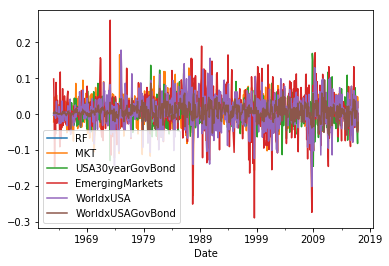

In [50]:



Data.plot()
plt.show()

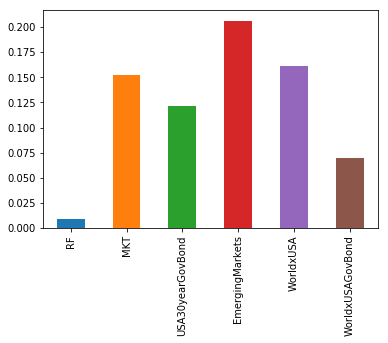

In [52]:
(Data.std()*12**0.5).plot(kind='bar')
plt.show()

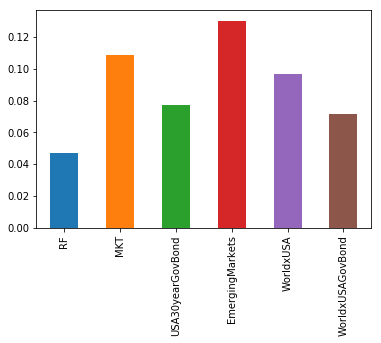

In [54]:
(Data.mean()*12).plot(kind='bar')
plt.show()

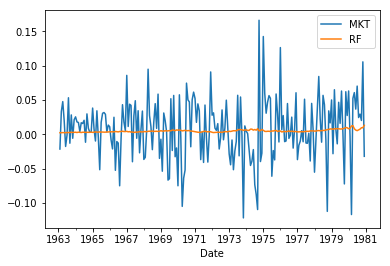

In [53]:
Data['1926':'1980'][["MKT",'RF']].plot()
plt.show()